<a href="https://colab.research.google.com/github/sushily1997/Project_1/blob/main/Lat_and_Lon_Bangalore_cafe__prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import datetime as dt
import plotly.express as px
import matplotlib.pyplot as plt
import missingno as msno
from datetime import timedelta
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Bangalore_cafe.csv.csv')
data

,pincode,officename,Districtname,regionname,Latitude,Longtude,Unnamed: 6
0,560063,A F Station Yelahanka S.O,Bangalore,Bangalore HQ,13.1322,77.3967,NaN
1,560007,Agram S.O,Bangalore,Bangalore HQ,13.0643,77.1260,NaN
2,560007,Air Force Hospital S.O,Bangalore,Bangalore HQ,13.0643,77.1260,NaN
3,560092,Amruthahalli B.O,Bangalore,Bangalore HQ,13.0583,77.5732,NaN
4,560024,Anandnagar S.O (Bangalore),Bangalore,Bangalore HQ,12.9714,77.5481,NaN
...,...,...,...,...,...,...,...
596,562138,Yeletotadahalli B.O,Ramanagar,Bangalore HQ,12.6928,76.6886,NaN
597,562110,Yeliyur B.O,Bangalore Rural,Bangalore HQ,13.2466,77.7118,NaN
598,562127,Yennegere B.O,Bangalore Rural,Bangalore HQ,13.0516,77.2642,NaN
599,562123,Yentiganahalli B.O,Bangalore Rural,Bangalore HQ,13.4675,77.1874,NaN


In [ ]:
df=data.head()
df

,pincode,officename,Districtname,regionname,Latitude,Longtude,Unnamed: 6
0,560063,A F Station Yelahanka S.O,Bangalore,Bangalore HQ,13.1322,77.3967,NaN
1,560007,Agram S.O,Bangalore,Bangalore HQ,13.0643,77.1260,NaN
2,560007,Air Force Hospital S.O,Bangalore,Bangalore HQ,13.0643,77.1260,NaN
3,560092,Amruthahalli B.O,Bangalore,Bangalore HQ,13.0583,77.5732,NaN
4,560024,Anandnagar S.O (Bangalore),Bangalore,Bangalore HQ,12.9714,77.5481,NaN


In [ ]:
df=data.drop(['Unnamed: 6'], axis = 1)
df

,pincode,officename,Districtname,regionname,Latitude,Longtude
0,560063,A F Station Yelahanka S.O,Bangalore,Bangalore HQ,13.1322,77.3967
1,560007,Agram S.O,Bangalore,Bangalore HQ,13.0643,77.1260
2,560007,Air Force Hospital S.O,Bangalore,Bangalore HQ,13.0643,77.1260
3,560092,Amruthahalli B.O,Bangalore,Bangalore HQ,13.0583,77.5732
4,560024,Anandnagar S.O (Bangalore),Bangalore,Bangalore HQ,12.9714,77.5481
...,...,...,...,...,...,...
596,562138,Yeletotadahalli B.O,Ramanagar,Bangalore HQ,12.6928,76.6886
597,562110,Yeliyur B.O,Bangalore Rural,Bangalore HQ,13.2466,77.7118
598,562127,Yennegere B.O,Bangalore Rural,Bangalore HQ,13.0516,77.2642
599,562123,Yentiganahalli B.O,Bangalore Rural,Bangalore HQ,13.4675,77.1874


In [ ]:
df.columns

Index(['pincode', 'officename', 'Districtname', 'regionname', 'Latitude',
       'Longtude'],
      dtype='object')

In [ ]:
df.columns = ['Postcode', 'Neighbourhood', 'Districtname', 'Borough', 'Latitude', 'Longitude']

In [ ]:
df.head()

,Postcode,Neighbourhood,Districtname,Borough,Latitude,Longitude
0,560063,A F Station Yelahanka S.O,Bangalore,Bangalore HQ,13.1322,77.3967
1,560007,Agram S.O,Bangalore,Bangalore HQ,13.0643,77.1260
2,560007,Air Force Hospital S.O,Bangalore,Bangalore HQ,13.0643,77.1260
3,560092,Amruthahalli B.O,Bangalore,Bangalore HQ,13.0583,77.5732
4,560024,Anandnagar S.O (Bangalore),Bangalore,Bangalore HQ,12.9714,77.5481


In [ ]:
df = df[['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude']]

In [ ]:
df.columns

Index(['Postcode', 'Borough', 'Neighbourhood', 'Latitude', 'Longitude'], dtype='object')

In [ ]:
df.head()

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,560063,Bangalore HQ,A F Station Yelahanka S.O,13.1322,77.3967
1,560007,Bangalore HQ,Agram S.O,13.0643,77.1260
2,560007,Bangalore HQ,Air Force Hospital S.O,13.0643,77.1260
3,560092,Bangalore HQ,Amruthahalli B.O,13.0583,77.5732
4,560024,Bangalore HQ,Anandnagar S.O (Bangalore),12.9714,77.5481


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 601 entries, 0 to 600
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Postcode       601 non-null    int64  
 1   Borough        601 non-null    object 
 2   Neighbourhood  601 non-null    object 
 3   Latitude       601 non-null    float64
 4   Longitude      601 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 23.6+ KB


In [ ]:
df.isnull().sum()

Postcode         0
Borough          0
Neighbourhood    0
Latitude         0
Longitude        0
dtype: int64

Use geopy library to get the latitude and longitude values of Bangalore City

In [ ]:
address = 'Bangalore, Karnataka'

geolocator = Nominatim(user_agent="tr_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Bangalore City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Bangalore City are 12.9767936, 77.590082.


Create a map of New York with neighborhoods superimposed on top.

In [ ]:
# create map of Toronto using latitude and longitude values
map_bng = folium.Map(location=[latitude, longitude], zoom_start=9)

# add markers to map
for lat, lng, borough, neighborhood in zip(df['Latitude'], df['Longitude'], df['Borough'], df['Neighbourhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_bng)  
    
map_bng

Define Foursquare Credentials and Version

In [ ]:
CLIENT_ID = 'JWZWPU4GQ1WBMINFHG4WQIDAFAK0AEUP1KUCZV54AZ5VUQXC' # your Foursquare ID (The Foursquare API is a RESTful API based on HTTP requests and JSON responses.)
CLIENT_SECRET = 'MPPMNJFUII4K5WRAQ40CEAYVUWTRDBIJD3KP2MEMF4LQOO4W' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version (Application Program Interface)

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: JWZWPU4GQ1WBMINFHG4WQIDAFAK0AEUP1KUCZV54AZ5VUQXC
CLIENT_SECRET:MPPMNJFUII4K5WRAQ40CEAYVUWTRDBIJD3KP2MEMF4LQOO4W


In [ ]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

#2. Explore Neighbourhoods in Bangalore

In [ ]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

code to run the above function on each neighborhood and create a new dataframe called bng_venues.

In [ ]:
LIMIT = 10 # limit of number of venues returned by Foursquare API

bng_venues = getNearbyVenues(names=df['Neighbourhood'],
                                   latitudes=df['Latitude'],
                                   longitudes=df['Longitude']
                                  )

A F Station Yelahanka S.O
Agram S.O
Air Force Hospital S.O
Amruthahalli B.O
Anandnagar S.O (Bangalore)
Arabic College S.O
Attur B.O
Austin Town S.O
Banaswadi S.O
Bangalore Bazaar S.O
Bangalore International Airport S.O
Bangalore Sub Foreign Post S.O
Bellandur S.O
Benson Town S.O
Bhattarahalli S.O
Bidrahalli B.O
BSF Campus Yelahanka S.O
Byatarayanapura B.O
C.V.Raman Nagar S.O
CMM Court Complex S.O
CMP Centre And School S.O
CRPF Campus Yelahanka S.O
Devanagundi B.O
Devasandra S.O
Doddagubbi B.O
Doddanekkundi B.O
Domlur S.O
Doorvaninagar S.O
Dr. Ambedkar Veedhi S.O
Dr. Shivarama Karanth Nagar S.O
EPIP S.O
Fraser Town S.O
G.K.V.K. S.O
Gunjur B.O
H.A. Farm S.O
H.A.L II Stage H.O
H.K.P. Road S.O
Hebbal Kempapura S.O
HighCourt S.O
Hoodi B.O
Horamavu B.O
Hulsur Bazaar S.O
Indiranagar S.O (Bangalore)
ISRO Anthariksha Bhavan S.O
J.C.Nagar S.O
Jakkur B.O
Jalavayuvihar S.O
Jeevanbhimanagar S.O
Kadugodi Extention SO
Kadugodi S.O
Kalkunte B.O
Kalyananagar S.O
Kannamangala B.O
Kodigehalli B.O
Kothanu

In [ ]:
print(bng_venues.shape)
bng_venues

(1437, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amruthahalli B.O,13.0583,77.5732,chin lung,13.054561,77.573212,Bar
1,Amruthahalli B.O,13.0583,77.5732,Raj Murali Theatre,13.060574,77.576934,Movie Theater
2,Amruthahalli B.O,13.0583,77.5732,Kodigehalli Railway Station (KDGH),13.062318,77.574956,Platform
3,Anandnagar S.O (Bangalore),12.9714,77.5481,D-Mart,12.974412,77.547368,Department Store
4,Anandnagar S.O (Bangalore),12.9714,77.5481,The Cinema GT World Mall,12.973697,77.551604,Multiplex
...,...,...,...,...,...,...,...
1432,Vishwanathapura B.O,13.2466,77.7118,Gamedrive Park,13.250608,77.710950,Campground
1433,Yadavanahalli B.O,12.7781,77.7726,Hotel Sree Sagar,12.777921,77.769706,Indian Restaurant
1434,Yadavanahalli B.O,12.7781,77.7726,Mayura Bakery,12.777789,77.769685,Bakery
1435,Yeliyur B.O,13.2466,77.7118,Muniraju Hindu Military Hotel,13.247370,77.715210,Indian Restaurant


#Let's check how many venues were returned for each neighborhood

In [ ]:
bng_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Abbur B.O,5,5,5,5,5,5
Adugodi S.O,4,4,4,4,4,4
Agara B.O,4,4,4,4,4,4
Alurduddanahalli B.O,2,2,2,2,2,2
Amruthahalli B.O,3,3,3,3,3,3
...,...,...,...,...,...,...
Yadavanahalli B.O,2,2,2,2,2,2
Yelachenahalli S.O,10,10,10,10,10,10
Yeliyur B.O,2,2,2,2,2,2


#Let's find out how many unique categories can be curated from all the returned venues

In [ ]:
print('There are {} uniques categories.'.format(len(bng_venues['Venue Category'].unique())))

There are 102 uniques categories.


#***3. Analyze Each Neighbourhood**

In [ ]:
# one hot encoding
bng_onehot = pd.get_dummies(bng_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
bng_onehot['Neighborhood'] = bng_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [bng_onehot.columns[-1]] + list(bng_onehot.columns[:-1])
bng_onehot = bng_onehot[fixed_columns]

bng_onehot.sample(5)

,Neighborhood,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Asian Restaurant,Auto Garage,BBQ Joint,Badminton Court,...,Sports Bar,Sports Club,Steakhouse,Tea Room,Toll Plaza,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Zoo Exhibit
181,Horamavu B.O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1094,Peenya Dasarahalli S.O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
442,Vidhana Soudha S.O,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
440,Vasanthanagar S.O,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1397,Samandur B.O,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bng_onehot.shape

(1437, 103)

#Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [ ]:
bng_grouped = bng_onehot.groupby('Neighborhood').mean().reset_index()
bng_grouped.sample(5)

,Neighborhood,ATM,American Restaurant,Andhra Restaurant,Arcade,Art Gallery,Asian Restaurant,Auto Garage,BBQ Joint,Badminton Court,...,Sports Bar,Sports Club,Steakhouse,Tea Room,Toll Plaza,Toy / Game Store,Train Station,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Zoo Exhibit
200,Sampangiramnagar S.O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
115,Kadugodi S.O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.1,0.0
106,Jalahalli H.O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.25,0.0,0.0
129,Koramangala S.O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
40,Budigere B.O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0


In [ ]:
bng_grouped.shape

(248, 103)

#Let's print each neighborhood along with the top 5 most common venues

In [ ]:
num_top_venues = 1

for hood in bng_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = bng_grouped[bng_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Abbur B.O----
               venue  freq
0  Indian Restaurant   0.2


----Adugodi S.O----
               venue  freq
0  Indian Restaurant  0.25


----Agara B.O----
         venue  freq
0  Coffee Shop  0.25


----Alurduddanahalli B.O----
               venue  freq
0  Indian Restaurant   0.5


----Amruthahalli B.O----
      venue  freq
0  Platform  0.33


----Anandnagar S.O (Bangalore)----
               venue  freq
0  Indian Restaurant  0.17


----Anekal S.O----
  venue  freq
0   ATM   0.5


----Anneshwara B.O----
               venue  freq
0  Indian Restaurant   0.5


----Aradeshanahalli B.O----
               venue  freq
0  Indian Restaurant   0.5


----Ashoknagar S.O (Bangalore)----
               venue  freq
0  Indian Restaurant  0.33


----Attibele S.O----
               venue  freq
0  Indian Restaurant   0.5


----Bagalur S.O (Bangalore)----
           venue  freq
0  Memorial Site   1.0


----Banashankari III Stage S.O----
            venue  freq
0  Clothing Store   0.3


----

#Let's put that into a pandas dataframe

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [ ]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = bng_grouped['Neighborhood']

for ind in np.arange(bng_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(bng_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Abbur B.O,Indian Restaurant,Furniture / Home Store,Bus Station,Pizza Place,Hyderabadi Restaurant,Juice Bar,Mobile Phone Shop,Pharmacy,Park,Outlet Store
1,Adugodi S.O,Indian Restaurant,Design Studio,Bus Station,Fast Food Restaurant,Platform,Pharmacy,Park,Outlet Store,Multiplex,Movie Theater
2,Agara B.O,Coffee Shop,Sports Club,Garden Center,Mattress Store,Juice Bar,Karnataka Restaurant,Pharmacy,Park,Outlet Store,Multiplex
3,Alurduddanahalli B.O,Indian Restaurant,Campground,Pub,Pizza Place,Pharmacy,Park,Outlet Store,Multiplex,Movie Theater,Motorcycle Shop
4,Amruthahalli B.O,Platform,Movie Theater,Bar,Metro Station,Pizza Place,Pharmacy,Park,Outlet Store,Multiplex,Motorcycle Shop
...,...,...,...,...,...,...,...,...,...,...,...
243,Yadavanahalli B.O,Indian Restaurant,Bakery,Metro Station,Pizza Place,Pharmacy,Park,Outlet Store,Multiplex,Movie Theater,Motorcycle Shop
244,Yelachenahalli S.O,Sandwich Place,Indian Restaurant,Burger Joint,Construction & Landscaping,Ice Cream Shop,Chinese Restaurant,Café,Movie Theater,Breakfast Spot,Pizza Place
245,Yeliyur B.O,Indian Restaurant,Campground,Pub,Pizza Place,Pharmacy,Park,Outlet Store,Multiplex,Movie Theater,Motorcycle Shop
246,Yeshwanthpur Bazar S.O,Indian Restaurant,Department Store,Multiplex,Shopping Mall,Bus Station,Fast Food Restaurant,Mobile Phone Shop,Pharmacy,Park,Outlet Store


In [ ]:
len(bng_grouped[bng_grouped["Coffee Shop"] > 0])

46

#Create a new DataFrame for Coffee Shop data only


In [ ]:
bng_coffee = bng_grouped[["Neighborhood","Coffee Shop"]]
bng_coffee

,Neighborhood,Coffee Shop
0,Abbur B.O,0.00
1,Adugodi S.O,0.00
2,Agara B.O,0.25
3,Alurduddanahalli B.O,0.00
4,Amruthahalli B.O,0.00
...,...,...
243,Yadavanahalli B.O,0.00
244,Yelachenahalli S.O,0.00
245,Yeliyur B.O,0.00
246,Yeshwanthpur Bazar S.O,0.00


#**4. Cluster Neighbourhoods**

Finding optimal k using elbow method

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
/usr/local/lib/python3

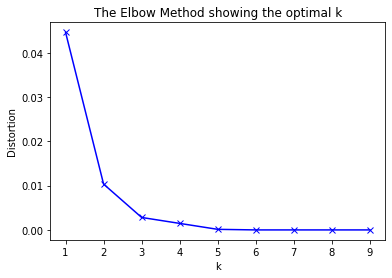

In [ ]:
# clustering dataset
# determine k using elbow method

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt


# create new plot and data
# plt.plot()
X = bng_coffee.drop('Neighborhood', 1)
# colors = ['b', 'g', 'r']
# markers = ['o', 'v', 's']

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
# set number of clusters
kclusters = 4

bng_clustering =bng_coffee.drop(["Neighborhood"], 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(bng_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
bng_merged = bng_coffee.copy()

# add clustering labels
bng_merged["Cluster Labels"] = kmeans.labels_
bng_merged

,Neighborhood,Coffee Shop,Cluster Labels
0,Abbur B.O,0.00,0
1,Adugodi S.O,0.00,0
2,Agara B.O,0.25,1
3,Alurduddanahalli B.O,0.00,0
4,Amruthahalli B.O,0.00,0
...,...,...,...
243,Yadavanahalli B.O,0.00,0
244,Yelachenahalli S.O,0.00,0
245,Yeliyur B.O,0.00,0
246,Yeshwanthpur Bazar S.O,0.00,0


In [ ]:
# merge bng_grouped with toronto_data to add latitude/longitude for each neighborhood
bng_merged = bng_merged.join(df.set_index("Neighbourhood"), on="Neighborhood")

print(bng_merged.shape)
bng_merged # check the last columns!

(258, 7)


,Neighborhood,Coffee Shop,Cluster Labels,Postcode,Borough,Latitude,Longitude
0,Abbur B.O,0.00,0,562108,Bangalore HQ,13.0366,77.6218
1,Adugodi S.O,0.00,0,560030,Bangalore HQ,12.9440,77.6079
2,Agara B.O,0.25,1,560034,Bangalore HQ,13.0381,77.6549
3,Alurduddanahalli B.O,0.00,0,562110,Bangalore HQ,13.2466,77.7118
4,Amruthahalli B.O,0.00,0,560092,Bangalore HQ,13.0583,77.5732
...,...,...,...,...,...,...,...
243,Yadavanahalli B.O,0.00,0,562107,Bangalore HQ,12.7781,77.7726
244,Yelachenahalli S.O,0.00,0,560078,Bangalore HQ,12.9057,77.5617
245,Yeliyur B.O,0.00,0,562110,Bangalore HQ,13.2466,77.7118
246,Yeshwanthpur Bazar S.O,0.00,0,560022,Bangalore HQ,12.9714,77.5481


In [ ]:
# sort the results by Cluster Labels
print(bng_merged.shape)
bng_merged.sort_values(["Cluster Labels"], inplace=True)
bng_merged

(258, 7)


,Neighborhood,Coffee Shop,Cluster Labels,Postcode,Borough,Latitude,Longitude
0,Abbur B.O,0.0,0,562108,Bangalore HQ,13.0366,77.6218
147,Makali B.O,0.0,0,562162,Bangalore HQ,12.9979,76.9628
148,Mallathahalli B.O,0.0,0,560056,Bangalore HQ,12.9979,77.5861
148,Mallathahalli B.O,0.0,0,561203,Bangalore HQ,13.4412,77.4596
149,Malleswaram S.O,0.0,0,560003,Bangalore HQ,13.0097,77.5648
...,...,...,...,...,...,...,...
50,Chandapura S.O,0.2,3,560081,Bangalore HQ,12.8029,77.7036
167,Muthanallur B.O,0.2,3,560099,Bangalore HQ,12.8029,77.7036
95,Huskur B.O,0.2,3,560099,Bangalore HQ,12.8029,77.7036
39,Bommasandra Industrial Estate S.O,0.2,3,560099,Bangalore HQ,12.8029,77.7036


#Finally, let's visualize the resulting clusters

In [ ]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(bng_merged['Latitude'], bng_merged['Longitude'], bng_merged['Neighborhood'], bng_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' - Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [ ]:
# save the map as HTML file
map_clusters.save('map_clusters.html')

#**5. Examine Clusters**


**Cluster 1**

In [ ]:
bng_merged.loc[bng_merged['Cluster Labels'] == 0]

,Neighborhood,Coffee Shop,Cluster Labels,Postcode,Borough,Latitude,Longitude
0,Abbur B.O,0.0,0,562108,Bangalore HQ,13.0366,77.6218
147,Makali B.O,0.0,0,562162,Bangalore HQ,12.9979,76.9628
148,Mallathahalli B.O,0.0,0,560056,Bangalore HQ,12.9979,77.5861
148,Mallathahalli B.O,0.0,0,561203,Bangalore HQ,13.4412,77.4596
149,Malleswaram S.O,0.0,0,560003,Bangalore HQ,13.0097,77.5648
...,...,...,...,...,...,...,...
68,Electronics City S.O,0.0,0,560100,Bangalore HQ,12.8458,77.6727
75,Gowdagere B.O,0.0,0,562108,Bangalore HQ,13.0366,77.6218
76,Guddanahalli B.O,0.0,0,562106,Bangalore HQ,12.7111,77.6956
106,Jalahalli H.O,0.0,0,560013,Bangalore HQ,13.0449,77.5490


**Cluster 2**

In [ ]:
bng_merged.loc[bng_merged['Cluster Labels'] == 1]

,Neighborhood,Coffee Shop,Cluster Labels,Postcode,Borough,Latitude,Longitude
212,St. John's Medical College S.O,0.25,1,560034,Bangalore HQ,13.0381,77.6549
28,Bettahalsur S.O,0.25,1,562157,Bangalore HQ,13.1438,77.6169
94,Hunasamaranahalli B.O,0.25,1,562157,Bangalore HQ,13.1438,77.6169
128,Koramangala I Block S.O,0.25,1,560034,Bangalore HQ,13.0381,77.6549
2,Agara B.O,0.25,1,560034,Bangalore HQ,13.0381,77.6549
60,Doddajala B.O,0.25,1,562157,Bangalore HQ,13.1438,77.6169
233,Vidyanagara B.O,0.25,1,562157,Bangalore HQ,13.1438,77.6169
218,Tarahunise B.O,0.25,1,562157,Bangalore HQ,13.1438,77.6169
53,Chikkajala B.O,0.25,1,562157,Bangalore HQ,13.1438,77.6169
129,Koramangala S.O,0.25,1,560034,Bangalore HQ,13.0381,77.6549


**Cluster 3**

In [ ]:
bng_merged.loc[bng_merged['Cluster Labels'] == 2]

,Neighborhood,Coffee Shop,Cluster Labels,Postcode,Borough,Latitude,Longitude
104,JP Nagar VIII phase S.O,0.100000,2,560076,Bangalore HQ,12.9833,77.5833
241,Wilson Garden S.O,0.100000,2,560027,Bangalore HQ,12.9506,77.5952
122,Kannamangala B.O,0.083333,2,562110,Bangalore HQ,13.2466,77.7118
115,Kadugodi S.O,0.100000,2,560067,Bangalore HQ,12.9833,77.5833
224,Thyagarajnagar S.O,0.100000,2,560004,Bangalore HQ,12.9833,77.5833
118,Kalkunte B.O,0.100000,2,560067,Bangalore HQ,12.9833,77.5833
122,Kannamangala B.O,0.083333,2,561203,Bangalore HQ,13.4412,77.4596
21,Bannerghatta Road S.O,0.100000,2,560076,Bangalore HQ,12.9833,77.5833
122,Kannamangala B.O,0.083333,2,560067,Bangalore HQ,12.9833,77.5833
114,Kadugodi Extention SO,0.100000,2,560067,Bangalore HQ,12.9833,77.5833


**Cluster 4**

In [ ]:
bng_merged.loc[bng_merged['Cluster Labels'] == 3]

,Neighborhood,Coffee Shop,Cluster Labels,Postcode,Borough,Latitude,Longitude
49,Chandapura B.O,0.2,3,560099,Bangalore HQ,12.8029,77.7036
50,Chandapura S.O,0.2,3,560081,Bangalore HQ,12.8029,77.7036
167,Muthanallur B.O,0.2,3,560099,Bangalore HQ,12.8029,77.7036
95,Huskur B.O,0.2,3,560099,Bangalore HQ,12.8029,77.7036
39,Bommasandra Industrial Estate S.O,0.2,3,560099,Bangalore HQ,12.8029,77.7036
95,Huskur B.O,0.2,3,562162,Bangalore HQ,12.9979,76.9628


**Observations:**

Most of the coffee shops are concentrated, with the highest number in cluster 2 and moderate number in cluster 3. On the other hand, cluster 4 has very low number of coffee shops and cluster 1 has totally no coffee shop in the neighborhoods. This represents a great opportunity and high potential areas to open new coffee shops as there is very little to no competition from existing coffee shops. Meanwhile, coffee shops in cluster 2 are likely suffering from intense competition due to oversupply and high concentration of coffee shops. From another perspective, this also shows that the oversupply of coffee shops mostly happened in the central area of the city, with the suburb area still have very few coffee shops. Therefore, this project recommends property developers to capitalize on these findings to open new coffee shops in neighborhoods in cluster 1 and 4 with little to no competition. Property developers with unique selling propositions to stand out from the competition can also open new coffee shops in neighborhoods in cluster 3 with moderate competition. Lastly, property developers are advised to avoid neighborhoods in cluster 2 which already have high concentration of coffee shops and suffering from intense competition.